# 2030ICT/7030ICT
## Introduction to Big Data Analytics
Assignment Specifications Part 1

Group Submission - Louise Howard, Caleb Davis, Mark English



# Section 1 - Data Analysis & Interpretation

## Part 1 - Analyse by Comparison

Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions:

Sydney and Brisbane

In [2]:
# import all libraries required in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
%matplotlib inline

# read in the data from the supplied assignment file and check input via table 
df = pd.read_csv("data_assignment.csv")

In [3]:
# ensure that we are always using cleaned date field  
df["Date"] = df["Date"].replace(to_replace = r'T.*', value = '', regex = True)

# print column headers to use to during program whe ncreating other dataframes
print(f'Column Headers {df.columns}')

Column Headers Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')


In [4]:
# select the top five cities to use during program. Can also use to change up the cities we want to compare against if need be.
Top5Cities = df["Location"].value_counts().index[0:5]
Top5Cities = Top5Cities.tolist()
Top5Cities

['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']

In [5]:
Top5Cities[0]

'Sydney'

In [6]:
#Assign a variable from top cities to be used in program
City1 = df.loc[df['Location'] == Top5Cities[0]]
City2 = df.loc[df['Location'] == Top5Cities[1]]
City3 = df.loc[df['Location'] == Top5Cities[2]]
City4 = df.loc[df['Location'] == Top5Cities[3]]
City5 = df.loc[df['Location'] == Top5Cities[4]]

In [7]:
# Which city has more jobs? 

# Cities selected are Sydney and Brisbane. These can be changed by assigning different City variable from above

selectedCity1 = City1
selectedCity2 = City3

# Count the number of times Sydney is in the data table and assume each is for a job
CityNumber1 = selectedCity1["Location"].value_counts()
# Count the number of times Brisbane is in the data table and assume each is for a job
CityNumber2 = selectedCity2["Location"].value_counts()
print(f'{CityNumber1.index[0]} has {CityNumber1[0]} jobs, while {CityNumber2.index[0]} has {CityNumber2[0]} jobs.')

Sydney has 46357 jobs, while Brisbane has 16538 jobs.


In [8]:
# How many jobs each type (casual, fulltime, etc.) are there in each city?

#Sydney
selectedCity1['JobType'].value_counts()

Full Time          32267
Contract/Temp       8420
Casual/Vacation     2542
Part Time           2277
Name: JobType, dtype: int64

In [9]:
# How many jobs each type (casual, fulltime, etc.) are there in each city?

#Brisbane
selectedCity2['JobType'].value_counts()

Full Time          10431
Contract/Temp       3164
Casual/Vacation     1543
Part Time            988
Name: JobType, dtype: int64

In [10]:
#Select the number of jobs for top 5 Job Classifications for each city

CityJobCount1 = []
for i in range(5):
    CityJobCount1.append((selectedCity1['Classification'].value_counts().index[i], selectedCity1['Classification'].value_counts()[i]))
CityJobCount2 = []
for i in range(5):
    CityJobCount2.append((selectedCity2['Classification'].value_counts().index[i], selectedCity2['Classification'].value_counts()[i]))

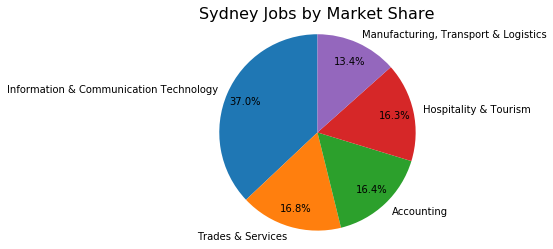

In [11]:
# Visualise the top 5 job sectors in pie chart for each city - Sydney

Labels1 = []
Size1 = []
for i in range(len(CityJobCount1)):
    Labels1.append(CityJobCount1[i][0])
    Size1.append(CityJobCount1[i][1])

# Pie chart for job market share of cities
plt.pie(Size1, labels=Labels1, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'{CityNumber1.index[0]} Jobs by Market Share',size=16,loc='center')
plt.show()

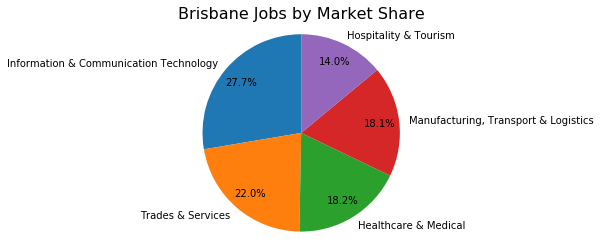

In [12]:
# Visualise the top 5 job sectors in pie chart for each city - Brisbane

Labels2 = []
Size2 = []
for i in range(len(CityJobCount2)):
    Labels2.append(CityJobCount2[i][0])
    Size2.append(CityJobCount2[i][1])

# Pie chart for job market share of cities
plt.pie(Size2, labels=Labels2, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'{CityNumber2.index[0]} Jobs by Market Share',size=16,loc='center')
plt.show()

In [13]:
# In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?
SalRangeA = []
for i in range(len(df['Location'])):
    if df['Location'][i] == CityNumber1.index[0]:
        SalRangeA.append(df['HighestSalary'][i])

SalRangeB = []
for i in range(len(df['Location'])):
    if df['Location'][i] == CityNumber2.index[0]:
        SalRangeB.append(df['HighestSalary'][i])

SalRangeACount = {}
for i in range(len(SalRangeA)):
    if SalRangeA[i] not in SalRangeACount:
        SalRangeACount[SalRangeA[i]] = 1
    else:
        count = SalRangeACount[SalRangeA[i]]
        SalRangeACount[SalRangeA[i]] = count + 1 


SalRangeBCount = {}
for i in range(len(SalRangeB)):
    if SalRangeB[i] not in SalRangeBCount:
        SalRangeBCount[SalRangeB[i]] = 1
    else:
        count = SalRangeBCount[SalRangeB[i]]
        SalRangeBCount[SalRangeB[i]] = count + 1 


Sydney has salary ranges of {30: 8427, 40: 3035, 50: 4406, 60: 3751, 70: 4152, 80: 3850, 100: 3702, 120: 4330, 150: 4228, 200: 4718, 250: 1758} 



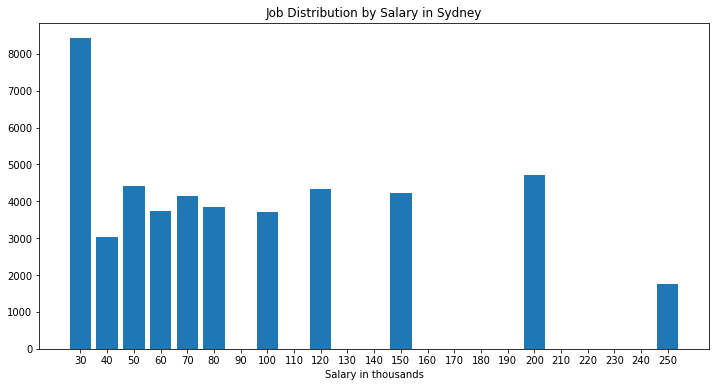

In [14]:
print(f'{CityNumber1.index[0]} has salary ranges of {SalRangeACount} \n')

CityA = SalRangeACount.keys()
Citya = SalRangeACount.values()

plt.figure(figsize=(12,6))

plt.bar(CityA, Citya, width = 8, align = 'center')
plt.title(f'Job Distribution by Salary in {CityNumber1.index[0]}')
plt.xlabel('Salary in thousands')
plt.xticks(np.arange(min(CityA), max(CityA)+1, 10))
plt.show()

Brisbane has salary ranges of {30: 2962, 40: 1192, 50: 2271, 60: 1481, 70: 1611, 80: 1384, 100: 1317, 120: 1494, 150: 1076, 200: 1202, 250: 548}



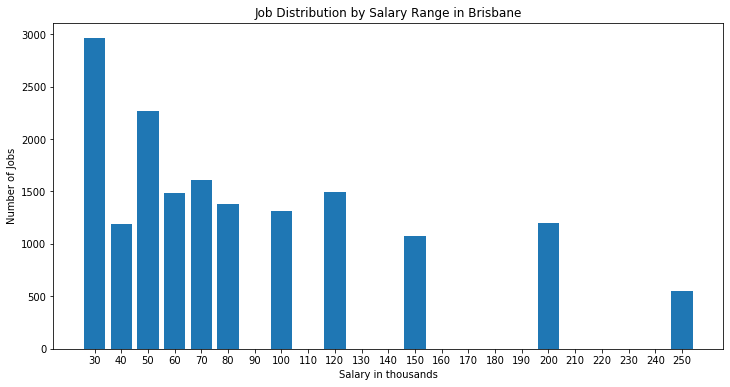

In [15]:
print(f'{CityNumber2.index[0]} has salary ranges of {SalRangeBCount}\n')


CityB = SalRangeBCount.keys()
Cityb = SalRangeBCount.values()

plt.figure(figsize=(12,6))

plt.bar(CityB, Cityb, width = 8, align = 'center')
plt.title(f'Job Distribution by Salary Range in {CityNumber2.index[0]}')
plt.xlabel('Salary in thousands')
plt.ylabel('Number of Jobs')
plt.xticks(np.arange(min(CityB), max(CityB)+1, 10))
plt.show()


In [16]:
# In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid? (1 point)
# Sydney has both a higher number of jobs and the graph shows a larger proportion of sydney jobs are in those higher brackets that in brisbane


In [17]:
# List top 5 companies in each city? Which sectors do they belong to?

#Sydney Top 5 Companies
Top5Companies1 = selectedCity1["Company"].value_counts().index[0:5]
Top5Companies1 = Top5Companies1.tolist()
print(Top5Companies1)
selectedCity1["Company"].value_counts()[0:5]


['Jora Local', 'Robert Walters', 'Design & Build', 'Bluefin Resources Pty Limited', 'Paxus']


Jora Local                       1426
Robert Walters                    448
Design & Build                    407
Bluefin Resources Pty Limited     254
Paxus                             251
Name: Company, dtype: int64

In [18]:
#Brisbane Top 5 Companies
Top5Companies2 = selectedCity2["Company"].value_counts().index[0:5]
Top5Companies2 = Top5Companies2.tolist()
print(Top5Companies2)
selectedCity2["Company"].value_counts()[0:5]


['Jora Local', 'u&u. Recruitment Partners', 'Hudson', 'The University of Queensland', 'Programmed Skilled Workforce']


Jora Local                      238
u&u. Recruitment Partners       191
Hudson                          187
The University of Queensland    180
Programmed Skilled Workforce    171
Name: Company, dtype: int64

In [19]:
def ClassCount(Location):
    return Location['Classification'].value_counts()[0:40] # change the last value to see more or less sectors

In [20]:
# List all the job sectors for the top 5 companies in selected city #1
print(f'Top 5 Companies in {CityNumber1.index[0]} \n')
for i in range(5):
    print(Top5Companies1[i])
    City1Comp = selectedCity1.loc[selectedCity1['Company'] == Top5Companies1[i]]
    print(ClassCount(City1Comp), end = '\n \n')


Top 5 Companies in Sydney 

Jora Local
Hospitality & Tourism         1398
Trades & Services               15
Retail & Consumer Products      13
Name: Classification, dtype: int64
 
Robert Walters
Information & Communication Technology    196
Accounting                                 75
Banking & Financial Services               64
Administration & Office Support            36
Call Centre & Customer Service             15
Marketing & Communications                 14
Engineering                                12
Manufacturing, Transport & Logistics        9
Sales                                       8
Human Resources & Recruitment               6
Legal                                       6
Consulting & Strategy                       3
Real Estate & Property                      2
Insurance & Superannuation                  2
Name: Classification, dtype: int64
 
Design & Build
Construction                            234
Real Estate & Property                   64
Trades & Services   

In [21]:
# List all the job sectors for the top 5 companies in selected city #2
print(f'Top 5 Companies in {CityNumber2.index[0]} \n')
for j in range(5):
    print(Top5Companies2[j])
    City2Comp = selectedCity2.loc[selectedCity2['Company'] == Top5Companies2[j]]
    print(ClassCount(City2Comp), end = '\n \n')

Top 5 Companies in Brisbane 

Jora Local
Hospitality & Tourism         235
Trades & Services               2
Retail & Consumer Products      1
Name: Classification, dtype: int64
 
u&u. Recruitment Partners
Information & Communication Technology    85
Accounting                                26
Legal                                     17
Human Resources & Recruitment             12
Marketing & Communications                11
Administration & Office Support            8
Construction                               6
Engineering                                5
Sales                                      5
Banking & Financial Services               3
Consulting & Strategy                      3
Government & Defence                       2
Manufacturing, Transport & Logistics       2
Design & Architecture                      2
Mining, Resources & Energy                 1
Education & Training                       1
Community Services & Development           1
Call Centre & Customer Servic

In [22]:
# Between 2 cities, which do you think it is better for employees. Explain your choice

## Part 2 - Analyse by Time

In [23]:
#extra stuff needed before we continue

months = [0,31,29,31,30,31,30,31,31,30,31,30,31]
DayOfTheWeek = {'Sunday': 0, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0}
dates = df['Date'].value_counts()
Dates = []
for i in range(len(dates)):
    Dates.append(dates.index[i])

for j in range(len(Dates)):
    ThisDate = Dates[j].split('-')
    Dates[j] = ThisDate[1:3]

def xToDay(x):
    if (x == 0):
        return 'Sunday'
    elif (x == 1):
        return 'Monday'
    elif (x == 2):
        return 'Tuesday'
    elif (x == 3):
        return 'Wednesday'
    elif (x == 4):
        return 'Thursday'
    elif (x == 5):
        return 'Friday'
    elif (x == 6):
        return 'Saturday'

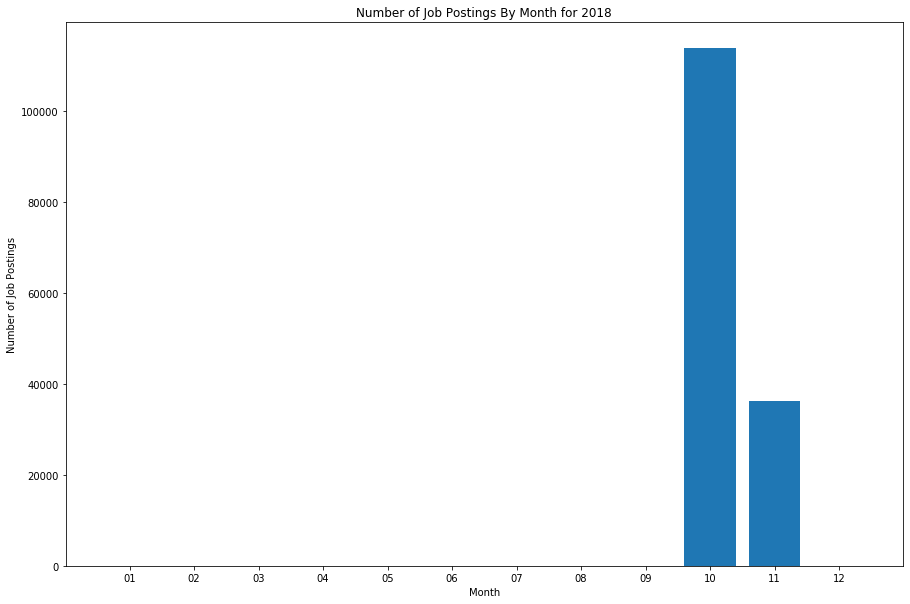

In [24]:
# Visualise the number of job posts by month. (Graph)
MonthOfYear = {'01': 0,'02': 0,'03': 0,'04': 0,'05': 0,'06': 0,'07': 0,'08': 0,'09': 0,'10': 0,'11': 0,'12': 0}
for i in range(len(Dates)):
    # store counter to MonthOfYear dictionary
    MonthOfYear[Dates[i][0]] = int(MonthOfYear[Dates[i][0]]) + dates[i]

plt.figure(figsize=(15,10))
plt.title('Number of Job Postings By Month for 2018')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
Yaxis = MonthOfYear.values()
Xaxis = MonthOfYear.keys()
plt.bar(Xaxis, Yaxis, align = 'center')
plt.show()

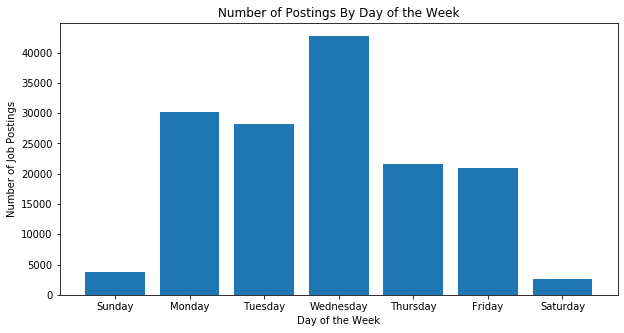

In [25]:
# Visualise the number of job posts by day of week (Graph)
x = int
for i in range(len(Dates)):
    # Find day of the week
    if (Dates[i][0] == '10'):
        x = int(Dates[i][1]) % 7 
    elif (Dates[i][0] == '11'): 
        x = (int(Dates[i][1]) + 31) % 7 
    # store counter to dictionary
    DayOfTheWeek[xToDay(x)] = DayOfTheWeek[xToDay(x)] + dates[i]

#DayOfTheWeek
plt.figure(figsize=(10,5))
plt.title('Number of Postings By Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Job Postings')
Yaxis = DayOfTheWeek.values()
Xaxis = DayOfTheWeek.keys()
plt.bar(Xaxis, Yaxis, align = 'center')
plt.show()

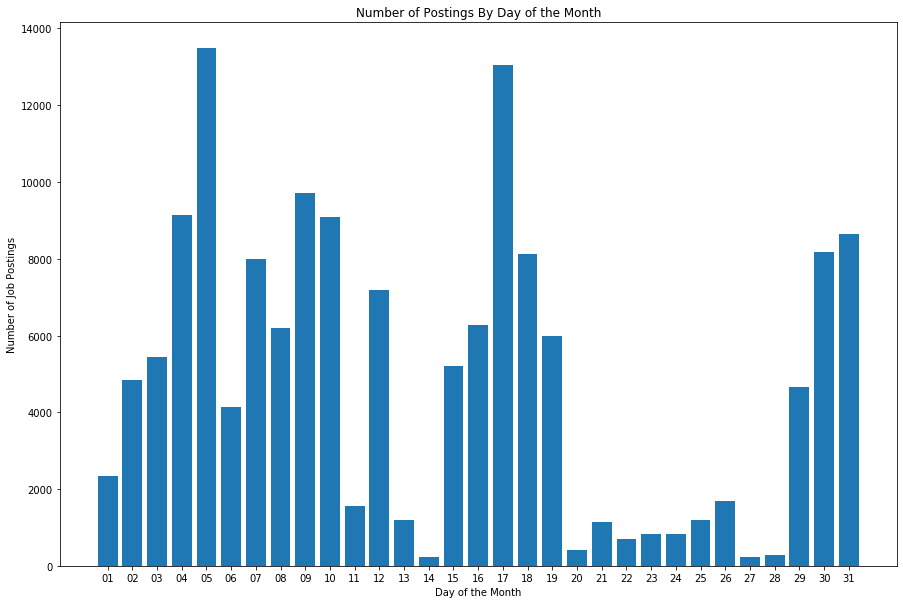

In [26]:
# Visualise the number of job posts by day of the month. (Graph)
DayOfTheMonth = {'01': 0,'02': 0,'03': 0,'04': 0,'05': 0,'06': 0,'07': 0,'08': 0,'09': 0,'10': 0,'11': 0,'12': 0,'13': 0,'14': 0,'15': 0,'16': 0,'17': 0,'18': 0,'19': 0,'20': 0,'21': 0,'22': 0,'23': 0,'24': 0,'25': 0,'26': 0,'27': 0,'28': 0,'29': 0,'30': 0, '31': 0}
x = int
for i in range(len(Dates)):
    # store counter to dictionary
    DayOfTheMonth[Dates[i][1]] = int(DayOfTheMonth[Dates[i][1]]) + dates[i]
#DayOfTheMonth
plt.figure(figsize=(15,10))
plt.title('Number of Postings By Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Job Postings')
Yaxis = DayOfTheMonth.values()
Xaxis = DayOfTheMonth.keys()
plt.bar(Xaxis, Yaxis, align = 'center')
plt.show()

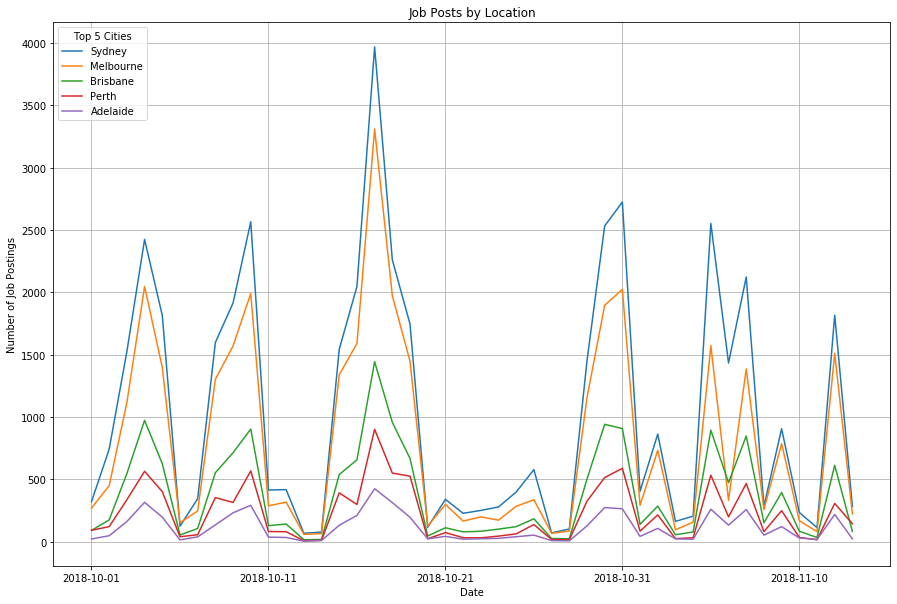

In [27]:
# Visualise trending of the job postings for the big cities (Graph)
#2nd for loop for each selcity
City1Date = City1['Date'].value_counts().sort_index()
City2Date = City2['Date'].value_counts().sort_index()
City3Date = City3['Date'].value_counts().sort_index()
City4Date = City4['Date'].value_counts().sort_index()
City5Date = City5['Date'].value_counts().sort_index()
CityNo = [City1Date, City2Date, City3Date, City4Date, City5Date]
plt.figure(figsize=(15,10))
for i in range(5):    
    plt.title(f'Job Posts by Location')
    plt.xlabel('Date')
    plt.ylabel('Number of Job Postings')
    CityNo[i].plot(kind='line')

# labels for graph legend
name1 = Top5Cities[0]
name2 = Top5Cities[1]
name3 = Top5Cities[2]
name4 = Top5Cities[3]
name5 = Top5Cities[4]

plt.grid()
plt.legend([name1, name2, name3, name4, name5], loc = 'upper left', title = 'Top 5 Cities')

plt.show()

## Part 3 - Forecasting and skill extractions

In [28]:
# Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.** (3 points)

In [29]:
#select the dates and count them, then sort by date
graphDates = df['Date'].value_counts().sort_index()
#create new dataframe with index reset
newGraphDates = graphDates.reset_index()


In [30]:
#add 7 day and 30 day rolling information to dataframe

newGraphDates['7Days'] = newGraphDates.iloc[:,1].rolling(window = 7).mean()
newGraphDates['30Days'] = newGraphDates.iloc[:,1].rolling(window = 31).mean()

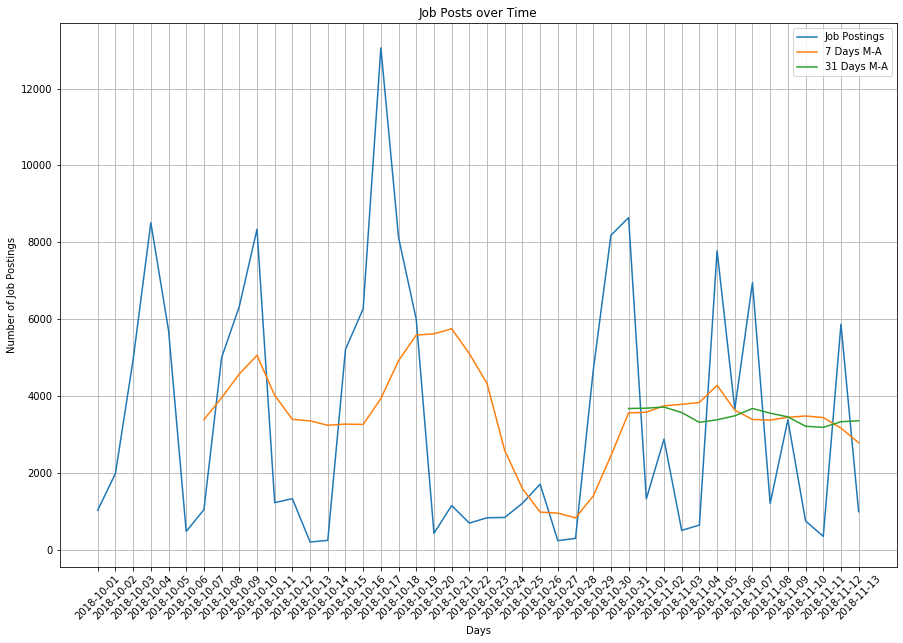

In [31]:
#plot the line graph with the 7 and 30 day moving average
x = newGraphDates['index']
Actual = newGraphDates['Date']
Actual7Days = newGraphDates['7Days']
Actual31Days = newGraphDates['30Days']
GraphLabels = [Actual, Actual7Days, Actual31Days]
plt.figure(figsize=(15,10))

for i in range(3):    
    plt.title(f'Job Posts over Time')
    plt.xlabel('Days')
    plt.ylabel('Number of Job Postings')
    plt.plot(x, GraphLabels[i])
plt.grid()
plt.xticks(rotation = 45)

plt.legend(['Job Postings', '7 Days M-A', '31 Days M-A'], loc = 'upper right')
plt.show()

In [32]:
# Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. 
# Visualise them in word cloud # chart (hint: you can use the online tool https://wordart.com/create or similar websites

# Selected job sector is Information & Communication Technology
it_documents = df.loc[df.Classification == "Information & Communication Technology"]
original_documents = it_documents["Requirement"]


In [33]:
# Use sklearn library to complete the td-idf across the "Requirement" column in the table 
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features = tfidf.fit(original_documents)
corpus_tf_idf = tfidf.transform(original_documents) 

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
# Look at the last 500 items
last500 = (sorted(words_freq, key = lambda x: x[1], reverse=True)[:500])


In [34]:
# take a copy of last500 for flooring the float number before it is converted to a dictionary
last500Floored = last500

# convert the last500 list of words to a dictionary to write to dataframes
convertList = dict(last500)
convertListFloored = convertList

#convert the dictionary to a dataframe
df500 = pd.DataFrame(list(convertList.items()),columns = ['Word','TD-IDF Value']) 

In [35]:
df500.head(5)

,Word,TD-IDF Value
0,opportunity,617.473531
1,join,607.745746
2,contract,606.967102
3,team,582.946959
4,business,518.815847


In [36]:
#floor the TD-IDF Column to remove the decimal places and then write to a CSV file for wordArt creation

for i in (convertList):
    convertListFloored[i] = math.floor((convertListFloored[i]))

In [37]:
# convert to a dataframe so it can be written to a csv file
df500Floored = pd.DataFrame(list(convertListFloored.items()),columns = ['Word','TD-IDF Value'])


In [38]:
# save the 500 words in the dataframe to a csv file so we can import into WordArt website
# this file has TD-IDF integers for inserting into wordArt with semi-colon as separators 
df500Floored.to_csv('wordArt1.csv',header=False, index=False, sep = ';')

# these 2 files are actuals with name and float numbers written as calculated
df500.to_csv('wordArt3.csv',header=True, index=False)
df500['Word'].to_csv('wordArt2.csv',header=False, index=False)

# Section 2 - Discussion

In [39]:
BrisbaneHighPay = City3.loc[City3['LowestSalary'] >= 80]

In [40]:
BrisJobCount = []
for i in range(5):
    BrisJobCount.append((BrisbaneHighPay['Classification'].value_counts().index[i], BrisbaneHighPay['Classification'].value_counts()[i]))

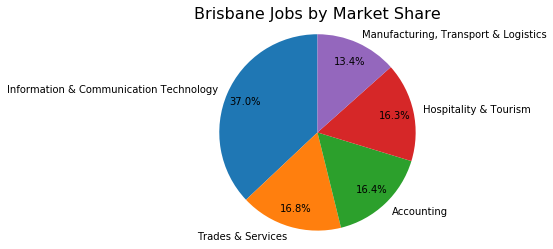

In [41]:
# Visualise the top 5 job sectors in pie chart for each city - Brisbane
Labels = []
Size = []
for i in range(len(BrisJobCount)):
    Labels.append(BrisJobCount[i][0])
    Size.append(BrisJobCount[i][1])

# Pie chart for job market share of cities
plt.pie(Size1, labels=Labels1, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Brisbane Jobs by Market Share',size=16,loc='center')
plt.show()


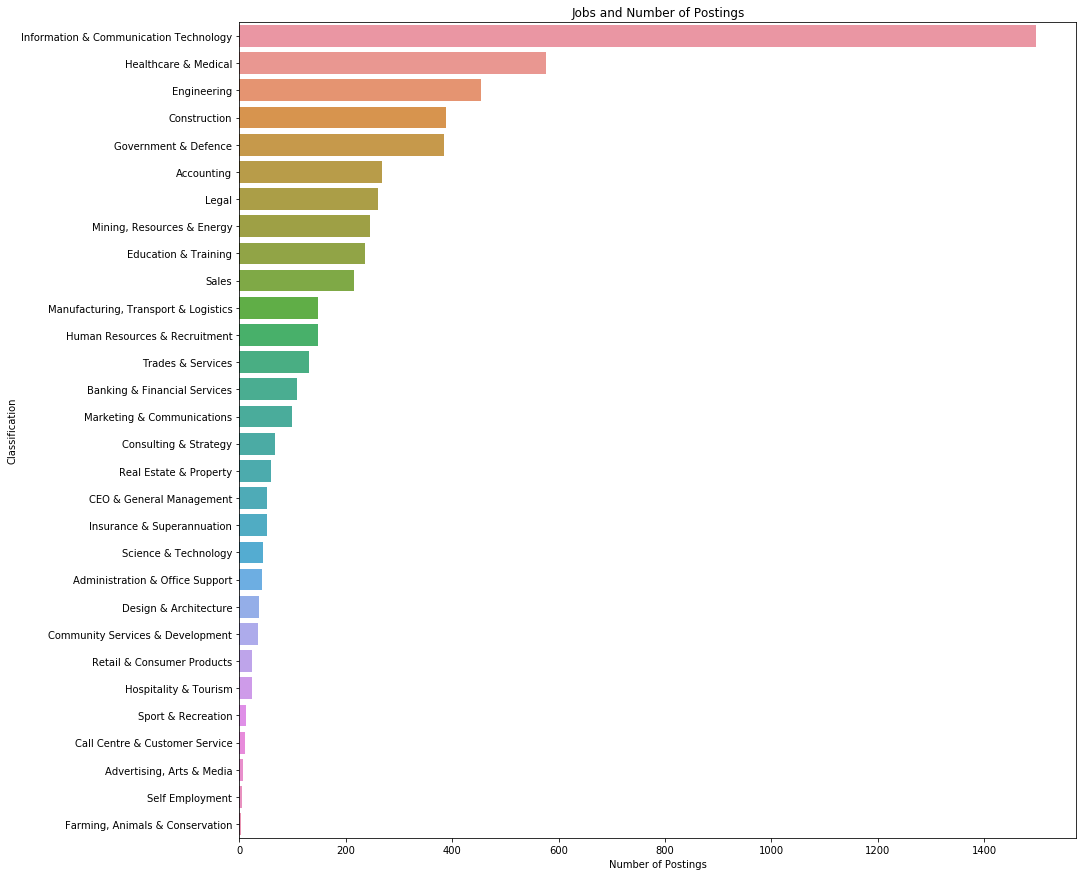

In [42]:
plt.figure(figsize=(15,15))
sns.countplot(y='Classification',data=BrisbaneHighPay,order=BrisbaneHighPay.Classification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()

In [43]:
Top5JobSec = BrisbaneHighPay['Classification'].value_counts().index[0:5]
Top5JobSec = Top5JobSec.tolist()
Top5JobSec
Sec1 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[0]]
Sec2 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[1]]
Sec3 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[2]]
Sec4 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[3]]
Sec5 = BrisbaneHighPay.loc[BrisbaneHighPay['Classification'] == Top5JobSec[4]]

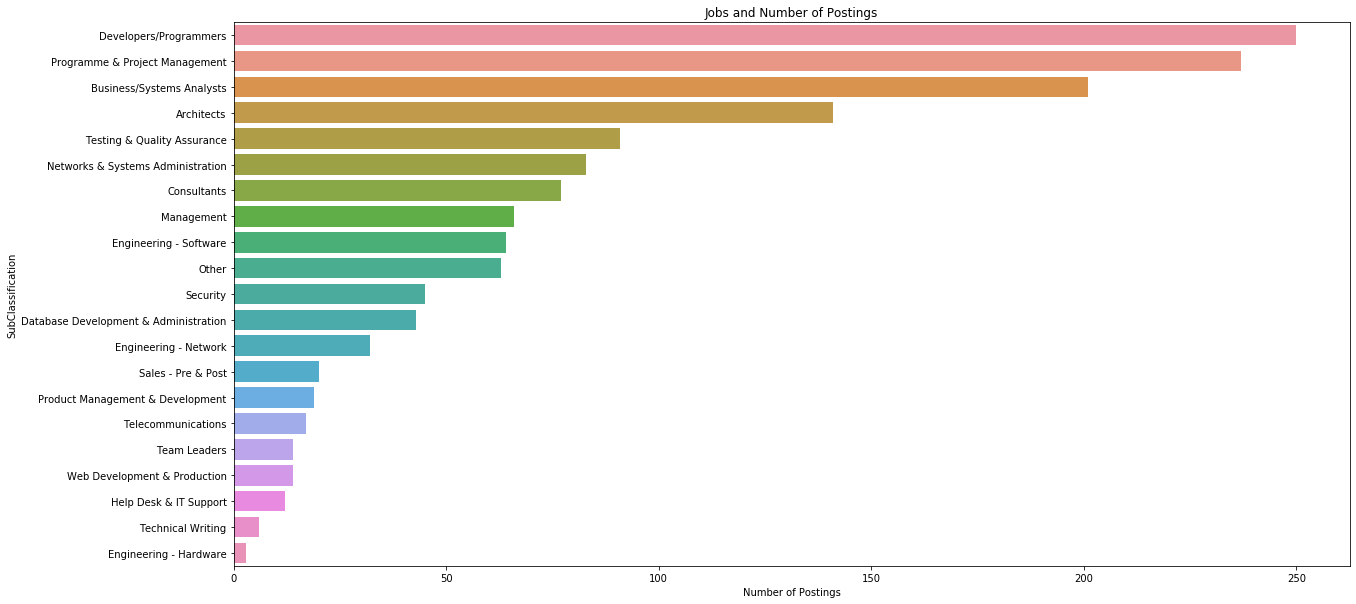

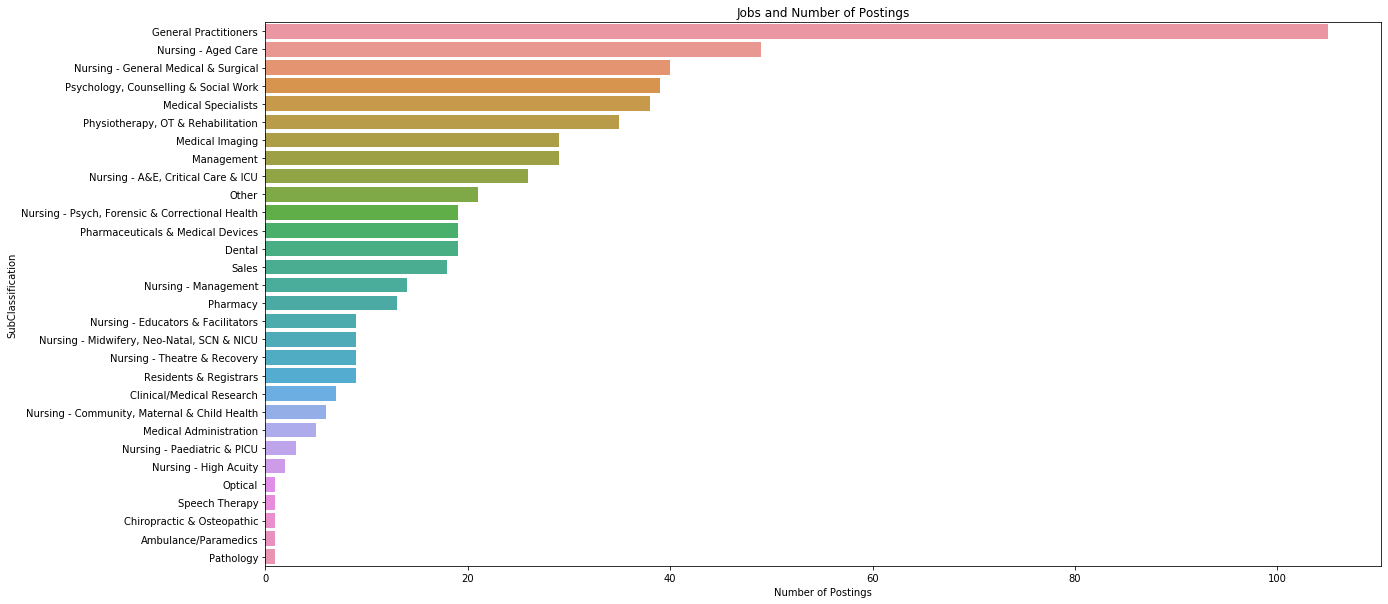

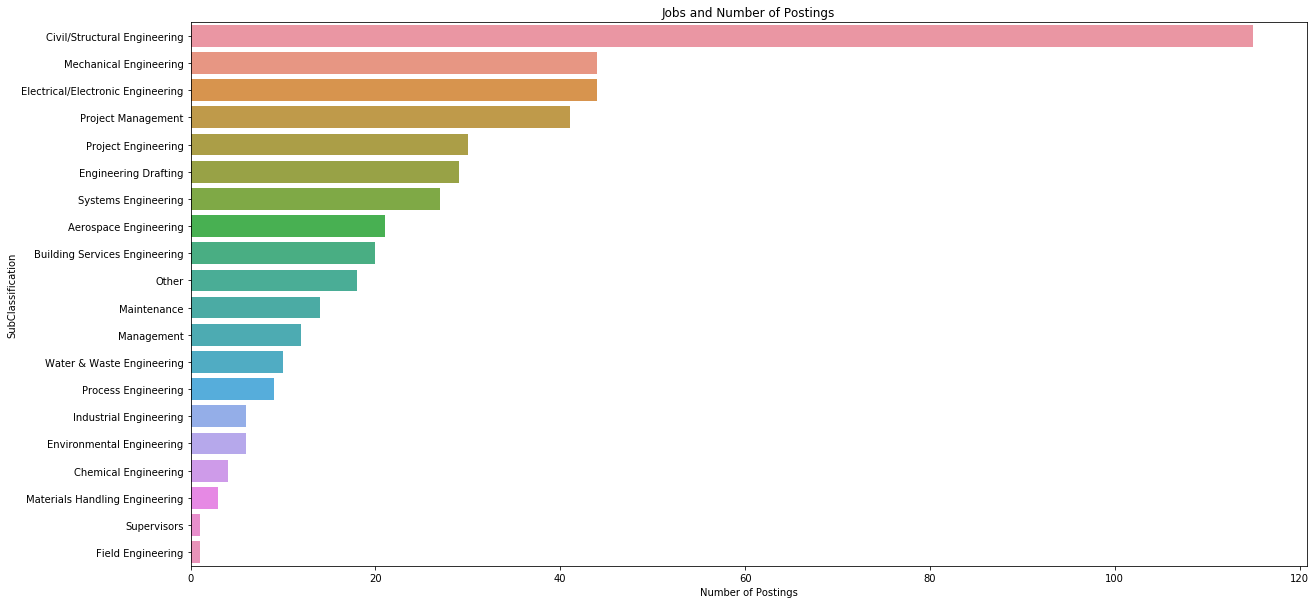

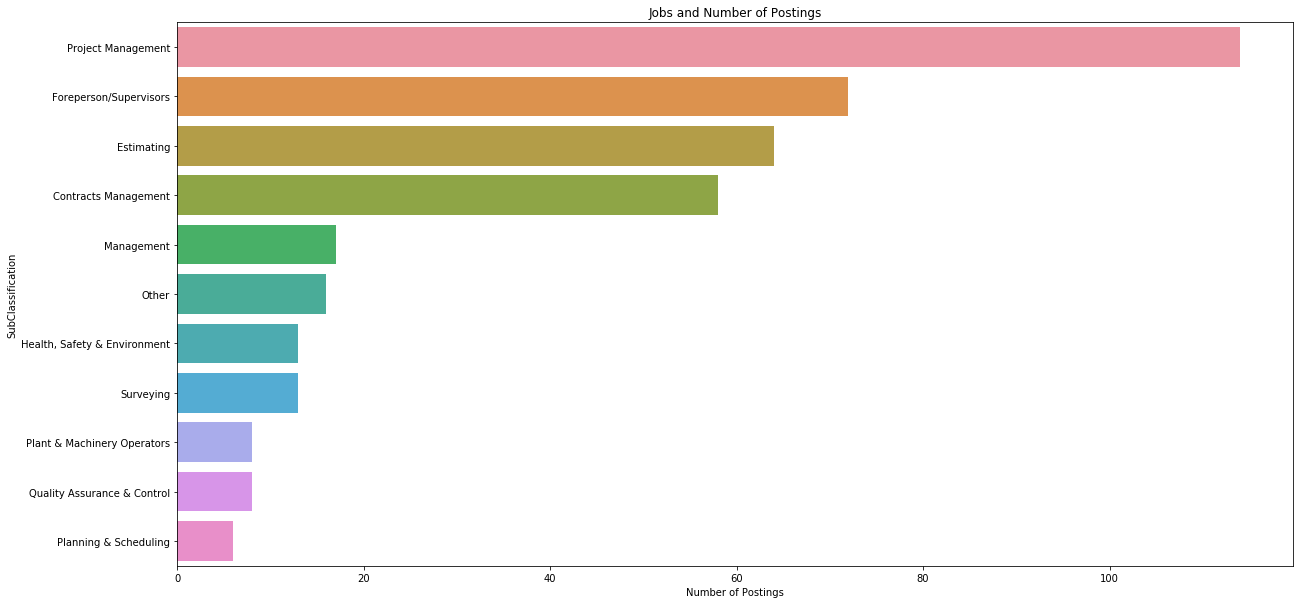

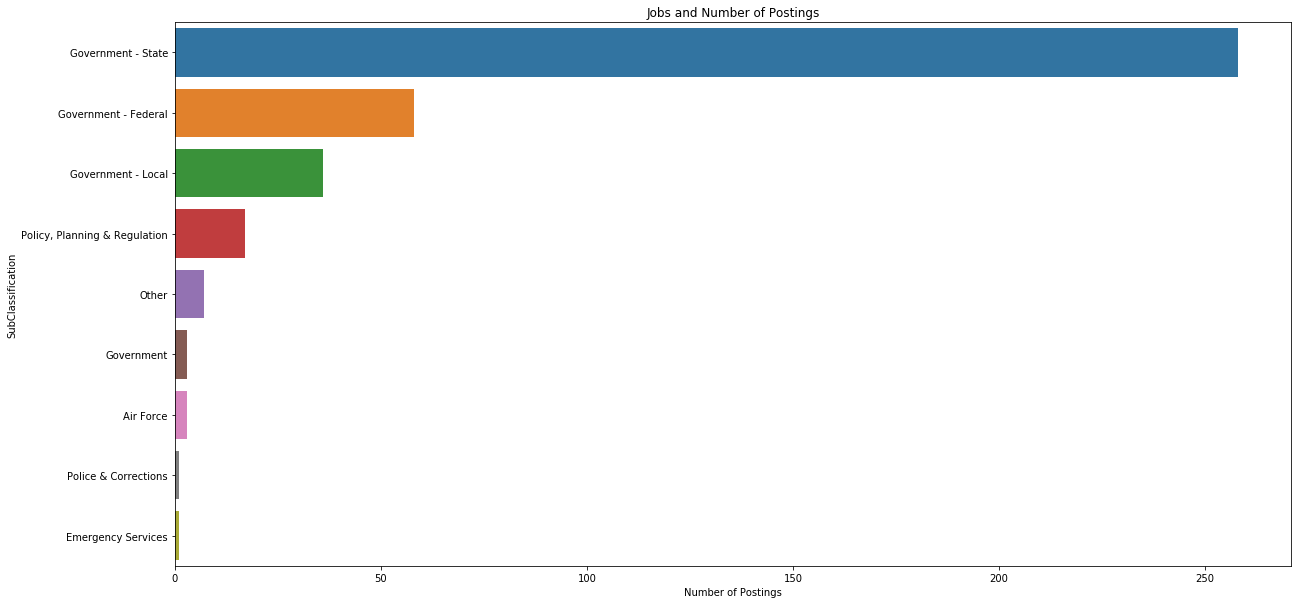

In [44]:
plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec1,order=Sec1.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec2,order=Sec2.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec3,order=Sec3.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec4,order=Sec4.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

plt.figure(figsize=(20,10)) 
sns.countplot(y='SubClassification',data=Sec5,order=Sec5.SubClassification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()